<a href="https://colab.research.google.com/github/URC-LCDN/geo_analitica_con_python/blob/main/GifParaCurvasPolares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

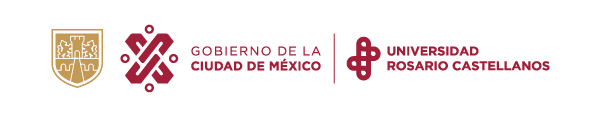

**Actualizado**: Agosto de 2023

## Introducción

En este colab explicamos una manera de hacer gif para una curva polar, en especifíco para la espiral de Arquímides.

## Espiral de Arquímides


Tomaremos como ejemplo la espiral de Arquímides. Esta espiral se define como el lugar geométrico de los puntos del plano cuya distancia a un punto fijo (polo) es proporcional a su ángulo polar. Su ecuación matemática es pues de la forma:

$$r = a\theta.$$

La gráfica asociada a la espiral de Arquímides es la imagen que se muestra a continuación.  

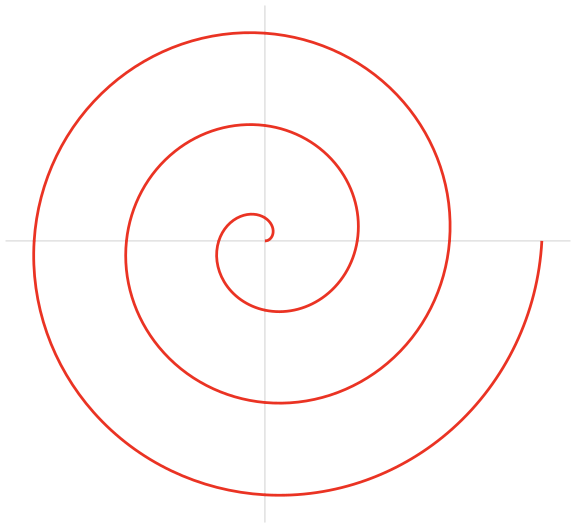

## Implementación

Haremos un gif con `Numpy` y `Matplotlib` para notar como se genera la espiral de Arquímides

In [4]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.cm import get_cmap
from mpl_toolkits.mplot3d import Axes3D
from IPython import display

#### Plano Polar

Definimos un plano polar vacío

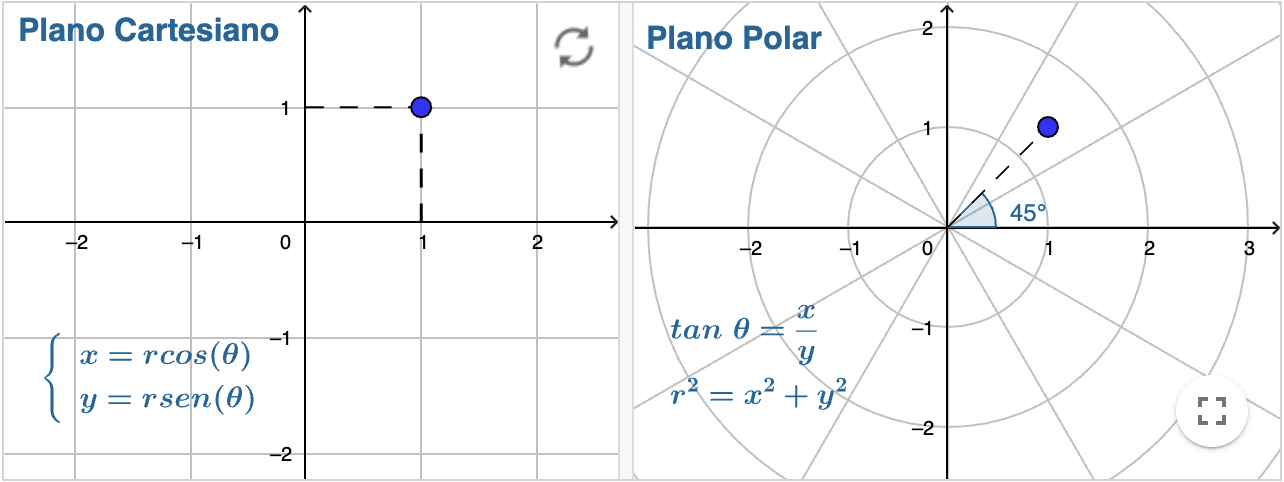

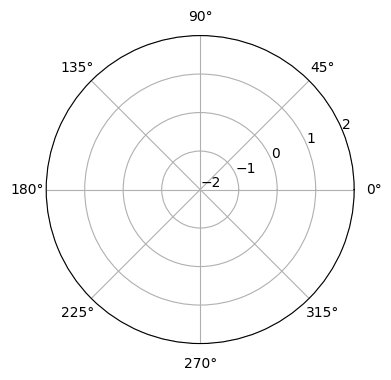

In [5]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(111, projection='polar')
ax.set_ylim([-2, 2])
ax.set(yticks=np.r_[-2:3])
fig.show()

### Espiral de Arquímides $r=a\theta$

Definimos la malla y la ecuación asociada.

In [6]:
# Definimos las variables goblales
PARTICION = 100
# Aquí puede poner el nombre que desee para su archivo
NAME = "Arquimides"

# Definimos las ecuaciones y la malla a utilizar.
# Aqui debemos tener presente los valores del intervalo a fragmentar
theta = np.linspace(0, 10*np.pi, PARTICION)
a = 5
r = a*theta

Gráfica simple

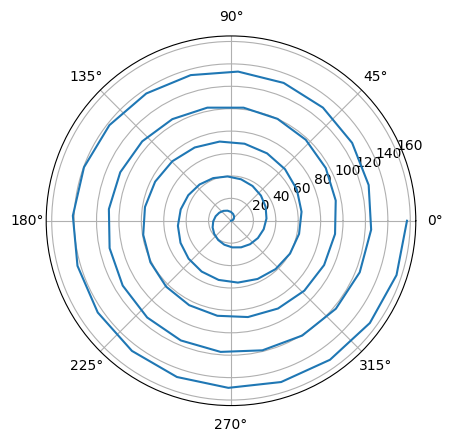

In [7]:
plt.polar(theta, r)
plt.show()

### Animación

In [8]:
# Definimos una funcion auxiliar
def fragmentar_array(numpy_array):
  """ Este funcion toma un numpy array
      [[a, b , c, d]] y lo conviernte en
      numpy array de la forma
      [
        [a, None, None, None],
        [a, b, None, None],
        [a, b, c, None],
        [a, b, c, d],
      ]
  """
  resultado = []
  list_ = numpy_array.tolist()
  for i in list_:
    index = list_.index(i)
    complemento = numpy_array.shape[0] - index - 1
    partial_list = list_[0:index+1] + [None for i_ in range(complemento)]
    resultado.append(partial_list)
  return np.array(resultado)


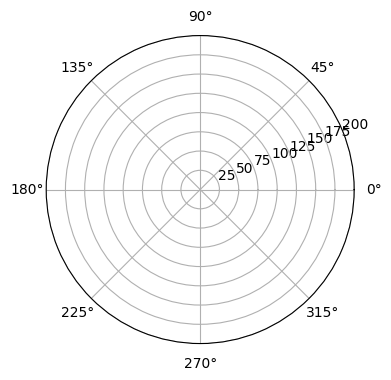

In [9]:
# Definimos las propiedades de la figura
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='polar')
ax.set_ylim([0, 2])
"""
  Ojo en la funcion set_ylim debemos tener cuidado con este límite
  para que la animación salga completa
"""
ax.set_ylim(0, 200)
theta_np = fragmentar_array(theta)
r_np = fragmentar_array(r)

"""
  Definimos una función para crear la animación, aquí
  extraemos cada componente i del np_array, es decir,
  np_array[i,:] para mostrar como se va formando una curva.
"""
l,  = ax.plot([],[])
def animacion(i):
  l.set_data(theta_np[i,:], r_np[i,:] )
  return l,

"""
El parametro `Interval` define la velocidad a la cual
se repoducirá el gif.
"""
# Creamos la animación
anim = FuncAnimation(
    fig, animacion,
    frames=PARTICION, interval=15,
    repeat=True
)

In [10]:
# Creamos un video
video = anim.to_html5_video()
html = display.HTML(video)
display.display(html)

**Remark**.

Dando clíck en los tres puntos del video se puede descargar como un archivo en formato mp4

In [11]:
# Guardamos el archivo en formato gif
anim.save(f'{NAME}.gif', writer='pillow')

**Remark**.

Ahora búsque su archivo en la parte izquierda de este Google Colab para descargarlo, dando clíck en el icono de la carpeta.

## Tarea

**Ejercicio**


Repita este procedimiento con otra curva polar y haga las adecuaciones necesarias.

**BONUS**

Haz un función que reciba como parámetro una curva polar y retorne un gif asociado a como se realiza su gráfica.

In [11]:
# Realiza aquí el ejercicio

## Bibliografía

*   Ramírez-Galarza, A. I. (2011). **Geometría analítica. Una introducción a la geometría**. Las Prensas de Ciencias.